# scikit-learnの使い方の紹介

* 参考情報
    * [Scipy lecture notes](https://scipy-lectures.org/packages/scikit-learn/index.html)

## 機械学習とは

* 機械学習とは
    * 観測したデータに適合するように調整可能なパラメータを自動的に調整するプログラム
    * 何らかの一般化によってより知的に振る舞うビルディングブロックとみなせる
        * データベースのようにデータを単純に保存・検索するのではない

## 機械学習の種類

### 教師あり学習

* 分類(`classification`)
    * 説明変数と目的変数のペアから評価セットに含まれるサンプルを分類するためのモデルを学習
    * 学習(`training`)
        * 複数の異なるクラスに属する学習セットに含まれるサンプルからそれらを正しいクラスへと分類するための分類境界を学習
    * 予測(`prediction`)
        * 学習した分類境界を元に評価セットに含まれるサンプルに対しそれらが属するクラスを予測
        * 評価セットのサンプルはどのクラスに属しているかは未知であるため、正解クラスを予測する
        
下記は赤と青の点群を分類するための分類境界を示した図であり、このような分類境界を自動的に見つけ出すことが分類モデルの役割である。

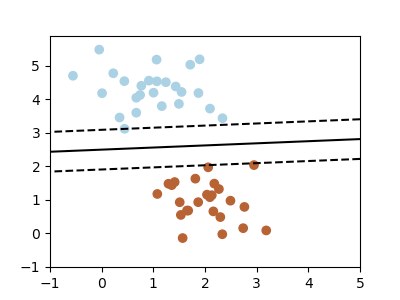

* 回帰(`regression`)
    * 学習(`training`)
    * 予測(`prediction`)
    
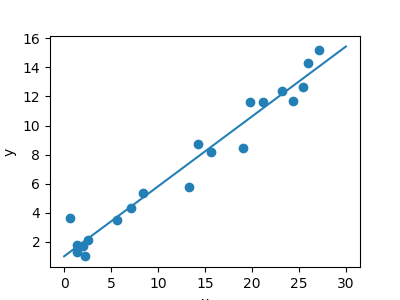

### 教師なし学習

* クラスタリング(`clustering`)
* 次元削減(`dimensionality reduction`)

---

## scikit-learnにおけるデータ構造

### データ行列

* scikit-learnではデータを`data=(n_samples, n_features)`の2次元配列(`numpy`配列)として表現
    * `n_samples`
        * サンプル数
            * `data[i]`は処理対象となるi番目のサンプルを表す
        * 各サンプルは数値表現可能なものであれば何でも良い(文書、画像、音声、動画、CSVファイルの列など)
    * `n_features`
        * 特徴量の次元数
        * 特徴量
            * 各々のサンプルを特徴づけるための数値データ
                * ex. 人間に対する`[身長、 体重]`のペア
                * 一般的には実数だが場合によっては真偽値や離散値であっても良い
            * `data[i][j]`はi番目のサンプルにおけるj番目の特徴を表す

---

### Iris Datasetによるデータ構造の実例

In [4]:
from sklearn.datasets import load_iris
iris = load_iris()

* `iris.data`に説明変数を表すデータ行列が存在
* `iris.target`に目的変数(クラスラベル)が存在している

In [5]:
print(iris.data.shape)

n_samples, n_features = iris.data.shape
print(n_samples)
print(n_features)

(150, 4)
150
4


150サンプル存在し、次元数が4次元であることが分かる

In [9]:
print(iris.data[0])  # 0サンプル目に格納されている数値データ(4次元)

[5.1 3.5 1.4 0.2]


In [10]:
print(iris.target.shape)
print(iris.target)
print(iris.target_names)

(150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


* 正解データ(クラスラベル)も入力サンプルと同じサンプル数だけ存在している
* クラスラベルは0, 1, 2のいずれか
    * それぞれ`sentosa`, `versicolor`, `virginica`を表す

In [72]:
import pandas as pd
import seaborn as sns

In [29]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [33]:
iris_df["species"] = iris.target_names[iris.target]

In [34]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


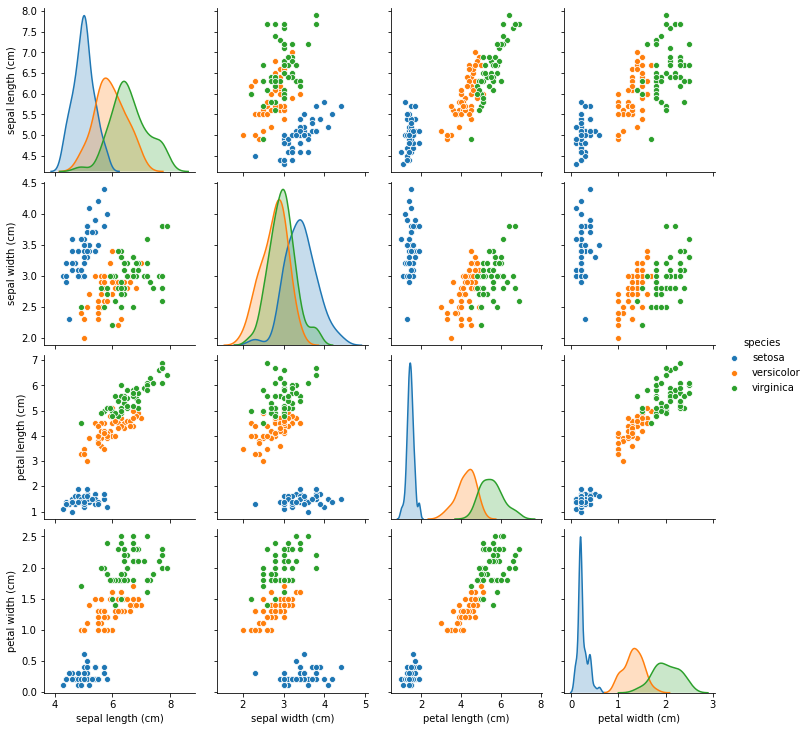

In [78]:
sns.pairplot(iris_df, hue='species')

---

## 分類モデルの実例

`K nearest neighbors(kNN)`は単純な分類器であり、新しいラベル未知の観測データに対し、

* `n_neighbors=1`の場合は既存の学習データの各サンプルのうち最も近いサンプルのラベルを返す
* `n_neighbors=k`の場合は既存の学習データの各サンプルの上位k番目までに近いサンプルにおいて最も多く出現したラベルを返す

In [54]:
X, y = iris.data, iris.target

In [55]:
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors=1)

In [56]:
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

In [57]:
x_test = [3, 5, 4, 2]
y_hat = knn.predict([x_test])
print(iris.target_names[y_hat])

['virginica']


knnの代わりに他の分類器のインスタンスを用いることでアルゴリズムを切り替えることが可能となる

---

## 予測モデルの実例

ここでは単純な線形回帰モデルを用いた線形回帰を行う。

In [64]:
import numpy as np
X = np.array([[0],
              [1],
              [2]])
y = np.array([1, 3, 5])

In [73]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

このmodelを用いて$ y = ax + b $ におけるa, bを`(x, y) = [(0, 1), (1, 3), (2, 5)]`というペアから推測する。

In [74]:
model.fit(X, y)

LinearRegression()

In [77]:
print(f"(a, b) = ({model.coef_}, {model.intercept_})")

(a, b) = ([2.], 1.0000000000000004)


fitの実行によって$\hat{y} = 2x + 1$となる予測モデルを学習できたことが分かる。

In [76]:
model.predict([[4],
               [5]])

array([ 9., 11.])

knnと同様に他の推定器のインスタンスを用いることでアルゴリズムを切り替えることが可能となる。

---

## scikit-learnのクラスにおけるインタフェース

* scikit-learnに存在する各推定器は共通のインタフェースを持っている
    * 推定器を別のクラスにするだけで容易にアルゴリズムの切り替えが可能となる

### 全推定器に存在

* `model.fit()`
    * 学習データに対してモデルを適応させる
    * 教師あり学習では2引数`(X, y)`を受け付ける(ex. `model.fit(X, y)`)
    * 教師なし学習では1引数`(X)`のみを受け付ける(ex. `model.fit(X)`)

### 教師あり学習の推定器に存在

* `model.predict()`
    * 学習済みのモデルを用いて新しいデータセットに対するラベルや予測値を推定
    * 1引数を受け付け、モデルが予測したラベルまたは予測値の配列を返却(ex, `y_hat = model.predict(X_new)`)
* `model.predict_proba()`
    * 分類問題において一部の推定器に実装されている
    * 入力サンプルが各々のカテゴリラベルに属する確率値を返却する
    * 最も高い確率値を持つラベルが`model.predict()`で返却される
* `model.score()`
    * 分類問題または回帰問題を扱う予測器のほぼ全てに実装されているスコアを返すメソッド
    * 0〜1で表されるスコアを返し、高いスコアほどよいフィッティングを表す

### 教師なし学習の推定器に存在

* `model.transform()`
    * fitting済みの教師なし学習用モデルを用いて入力データを新しい基底へと変換する
    * 1引数のみを受け付け新しい基底上で表現される変換後のデータ表現を返す(ex. `X_trans = model.transform(X_new)`)
* `model.fit_transform()`
    * 教師なし学習を行う一部の推定器に実装されている
    * 入力データに対する`fit()`と`transform()`を同時に実行する
        * ex. 次元削減を行うモデルでの`X_new_dim = model.fit_transform(X_old_dim)`

---

## どの推定器を使うべきか

[Choosing the right estimator](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)を参照するのが良い。

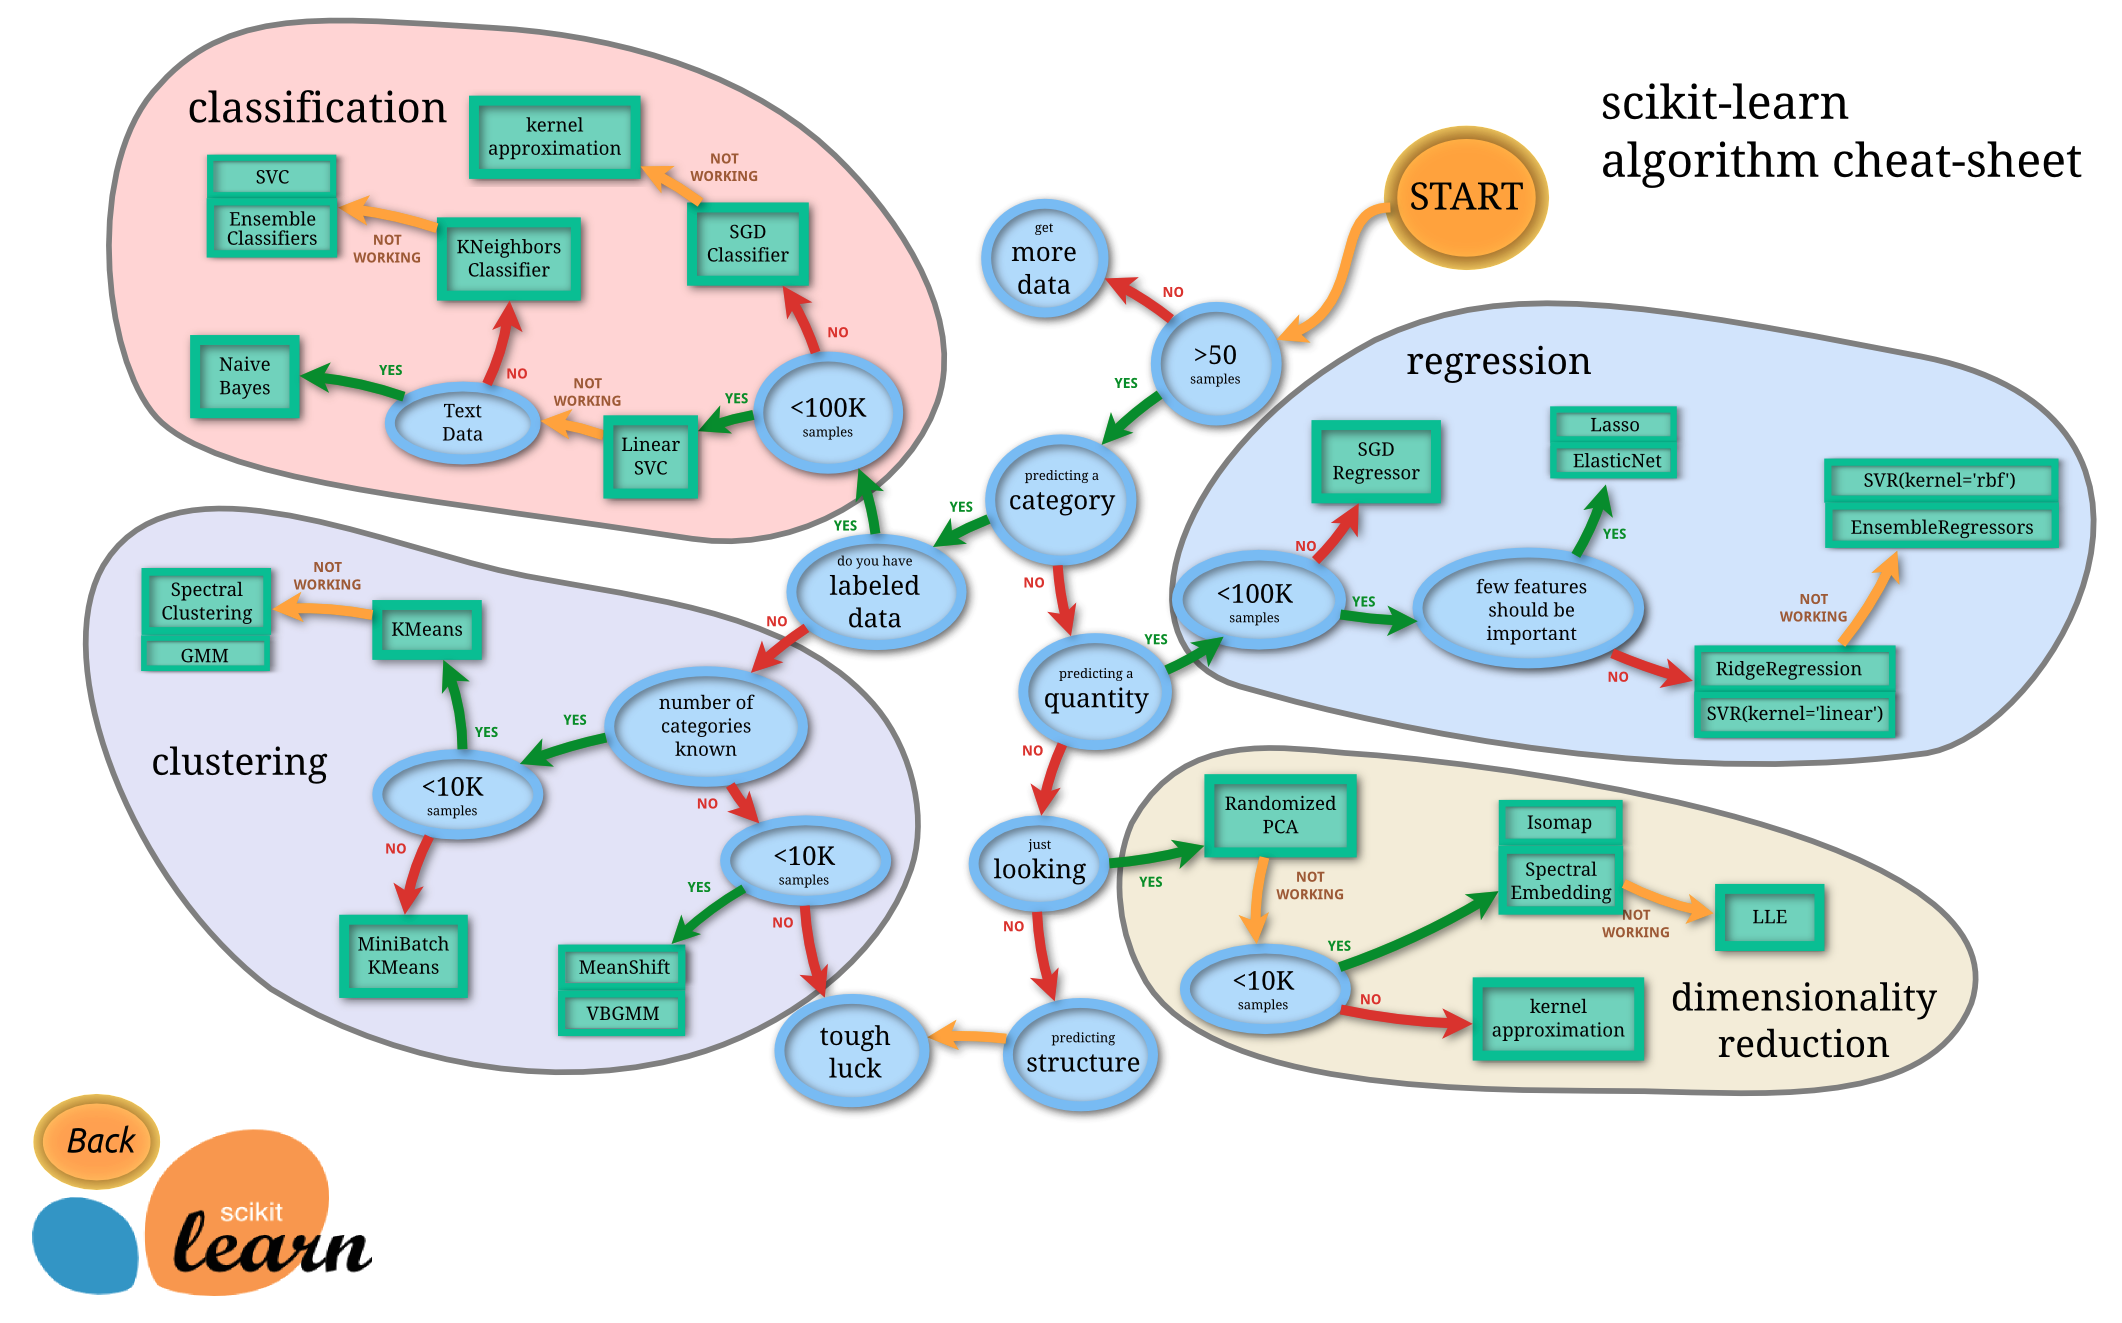